In [1]:
import os
import pandas as pd

file_path ="Train.csv"
if os.path.exists(file_path):
    chunk_iter = pd.read_csv(file_path, chunksize=1000)
    train = next(chunk_iter)
    print(train.head())
    print(train.info())
    print(train.describe())
    print(train.shape)
else:
    print(f"File not found: {file_path}. Please upload the file.")

   SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  YearMade  \
0  1139246      66000     999089     3157         121             3      2004   
1  1139248      57000     117657       77         121             3      1996   
2  1139249      10000     434808     7009         121             3      2001   
3  1139251      38500    1026470      332         121             3      2001   
4  1139253      11000    1057373    17311         121             3      2007   

   MachineHoursCurrentMeter UsageBand         saledate  ...  \
0                        68       Low  11/16/2006 0:00  ...   
1                      4640       Low   3/26/2004 0:00  ...   
2                      2838      High   2/26/2004 0:00  ...   
3                      3486      High   5/19/2011 0:00  ...   
4                       722    Medium   7/23/2009 0:00  ...   

  Undercarriage_Pad_Width Stick_Length Thumb Pattern_Changer Grouser_Type  \
0                     NaN          NaN   NaN             

In [2]:
train.isnull().sum()

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
auctioneerID                  0
YearMade                      0
MachineHoursCurrentMeter      0
UsageBand                   131
saledate                      0
fiModelDesc                   0
fiBaseModel                   0
fiSecondaryDesc             349
fiModelSeries               863
fiModelDescriptor           765
ProductSize                 537
fiProductClassDesc            0
state                         0
ProductGroup                  0
ProductGroupDesc              0
Drive_System                781
Enclosure                     1
Forks                       495
Pad_Type                    840
Ride_Control                668
Stick                       840
Transmission                608
Turbocharged                840
Blade_Extension             941
Blade_Width                 941
Enclosure_Type              941
Engine_H

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
auctioneerID                  0
YearMade                      0
MachineHoursCurrentMeter      0
UsageBand                   131
saledate                      0
fiModelDesc                   0
fiBaseModel                   0
fiSecondaryDesc             349
fiModelSeries               863
fiModelDescriptor           765
ProductSize                 537
fiProductClassDesc            0
state                         0
ProductGroup                  0
ProductGroupDesc              0
Drive_System                781
Enclosure                     1
Forks                       495
Pad_Type                    840
Ride_Control                668
Stick                       840
Transmission                608
Turbocharged                840
Blade_Extension             941
Blade_Width                 941
Enclosure_Type              941
Engine_H

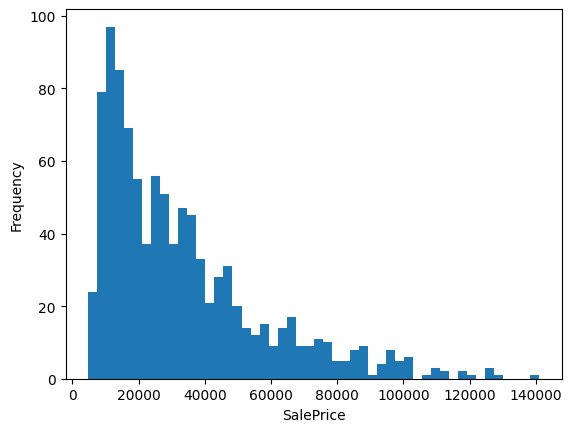

In [3]:
print(train.isnull().sum())

print(train.dtypes)

import matplotlib.pyplot as plt
plt.hist(train['SalePrice'], bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
auctioneerID                  0
YearMade                      0
MachineHoursCurrentMeter      0
UsageBand                   131
saledate                      0
fiModelDesc                   0
fiBaseModel                   0
fiSecondaryDesc             349
fiModelSeries               863
fiModelDescriptor           765
ProductSize                 537
fiProductClassDesc            0
state                         0
ProductGroup                  0
ProductGroupDesc              0
Drive_System                781
Enclosure                     1
Forks                       495
Pad_Type                    840
Ride_Control                668
Stick                       840
Transmission                608
Turbocharged                840
Blade_Extension             941
Blade_Width                 941
Enclosure_Type              941
Engine_H

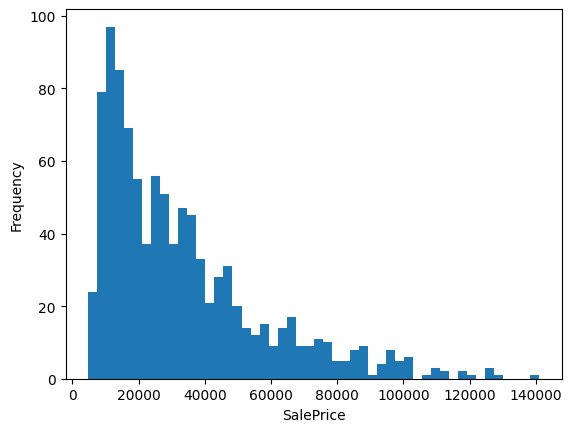

In [4]:
print(train.isnull().sum())

print(train.dtypes)

import matplotlib.pyplot as plt
plt.hist(train['SalePrice'], bins=50)
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

In [5]:
train.isnull().sum()

SalesID                       0
SalePrice                     0
MachineID                     0
ModelID                       0
datasource                    0
auctioneerID                  0
YearMade                      0
MachineHoursCurrentMeter      0
UsageBand                   131
saledate                      0
fiModelDesc                   0
fiBaseModel                   0
fiSecondaryDesc             349
fiModelSeries               863
fiModelDescriptor           765
ProductSize                 537
fiProductClassDesc            0
state                         0
ProductGroup                  0
ProductGroupDesc              0
Drive_System                781
Enclosure                     1
Forks                       495
Pad_Type                    840
Ride_Control                668
Stick                       840
Transmission                608
Turbocharged                840
Blade_Extension             941
Blade_Width                 941
Enclosure_Type              941
Engine_H

In [6]:
# Convert columns if needed, e.g., dates
train['saledate'] = pd.to_datetime(train['saledate'])
train['year']=train['saledate'].dt.year
train['month']=train['saledate'].dt.month
train['day']=train['saledate'].dt.day

# Drop columns that are not useful (e.g., identifiers except SalesID)
#train = train.drop(['SalesID', 'MachineID'], axis=1)



In [7]:

train=train.drop(['saledate','SalesID','MachineID'], axis=1, errors='ignore')

In [8]:
train = pd.get_dummies(train)

In [9]:
# handling missing value
# Fill numeric columns with median
train = train.fillna(train.median(numeric_only=True))

# Fill categorical columns with mode
for col in train.select_dtypes(include='object').columns:
    train[col] = train[col].fillna(train[col].mode()[0])
train.isnull().sum()   # checking for missing value

SalePrice                            0
ModelID                              0
datasource                           0
auctioneerID                         0
YearMade                             0
                                    ..
Travel_Controls_Pedal                0
Differential_Type_Limited Slip       0
Differential_Type_Standard           0
Steering_Controls_Command Control    0
Steering_Controls_Conventional       0
Length: 1218, dtype: int64

In [10]:
import pandas as pd

# Load datasets
test = pd.read_csv('Test.csv')

# handling missing value
# Fill numeric columns with median
test = test.fillna(test.median(numeric_only=True))

# Fill categorical columns with mode
for col in test.select_dtypes(include='object').columns:
    test[col] = test[col].fillna(test[col].mode()[0])
test.isnull().sum()   # checking for missing value


valid = pd.read_csv('Valid.csv')


# handling missing value
# Fill numeric columns with median
valid = valid.fillna(valid.median(numeric_only=True))

# Fill categorical columns with mode
for col in valid.select_dtypes(include='object').columns:
    valid[col] = valid[col].fillna(valid[col].mode()[0])
valid.isnull().sum()   # checking for missing value
# List of datasets for batch processing
datasets = [test, valid]


for df in datasets:
    # Fill missing numeric values with median
    for col in df.select_dtypes(include=['float64', 'int64']):
        df[col].fillna(df[col].median(), inplace=True)
    # Fill missing categorical values with mode
    for col in df.select_dtypes(include=['object']):
        df[col].fillna(df[col].mode()[0], inplace=True)
    # Convert 'saledate' to datetime and extract year and month
    df['saledate'] = pd.to_datetime(df['saledate'])
    df['year'] = df['saledate'].dt.year
    df['month'] = df['saledate'].dt.month
    # Drop non-useful columns
    
    df.drop([ 'MachineID', 'ModelID', 'datasource', 'auctioneerID'], axis=1, inplace=True, errors='ignore')
    # One-hot encode categorical variables
    df = pd.get_dummies(df)
    # Assign back to variable (important if you want to use the processed version)
    if df is test:
        test = df
    else:
        valid = df

# Show info to verify
print(test.head())
print(test.info())
print(valid.head())
print(valid.info())

C:\Users\abhis\AppData\Local\Temp\ipykernel_8072\3059673568.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\abhis\AppData\Local\Temp\ipykernel_8072\3059673568.py:34: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

   SalesID  YearMade  MachineHoursCurrentMeter UsageBand   saledate  \
0  1227829      1999                    3688.0       Low 2012-05-03   
1  1227844      1000                   28555.0      High 2012-05-10   
2  1227847      2004                    6038.0    Medium 2012-05-10   
3  1227848      2006                    8940.0      High 2012-05-10   
4  1227863      2005                    2286.0       Low 2012-05-10   

  fiModelDesc fiBaseModel fiSecondaryDesc fiModelSeries fiModelDescriptor  \
0        580G         580               G            II                 L   
1         936         936               G            II                 L   
2    EC210BLC       EC210               B            II                LC   
3       330CL         330               C            II                 L   
4        650K         650               K            II                 L   

   ...                Thumb      Pattern_Changer Grouser_Type  \
0  ...  None or Unspecified  None or Unspecif

In [11]:
from sklearn.preprocessing import LabelEncoder

In [12]:
# Ensure all datasets have the same columns as train
valid = valid.reindex(columns=train.columns, fill_value=0)
test = test.reindex(columns=train.columns, fill_value=0)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Separate features and target
X_train = train.drop(['SalePrice'], axis=1)
y_train = train['SalePrice']

# Split into train and validation sets


print("Missing values in y_train:", y_train.isnull().sum())
print("Missing values in X_train:", X_train.isnull().sum().sum())



Missing values in y_train: 0
Missing values in X_train: 0


In [14]:
# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [15]:
X_valid = valid.drop('SalePrice', axis=1)
y_valid = valid['SalePrice']

from sklearn.metrics import mean_squared_log_error
import numpy as np

# Predict on validation set
y_pred = model.predict(X_valid)
rmsle = np.sqrt(mean_squared_log_error(y_valid, y_pred))
print('RMSLE:', rmsle)


RMSLE: 10.555484670601434


In [16]:
from sklearn.linear_model import LinearRegression

In [17]:
# train linear regression mode
lr_model=LinearRegression()
lr_model.fit(X_train,y_train)
# prediction
lr_model_prediction=lr_model.predict(X_valid)

In [18]:
from sklearn.metrics import mean_squared_error
y_pred = model.predict(X_valid)

print(f'Mean Squared Error: {mse:.2f}')


NameError: name 'mse' is not defined

In [ ]:
y_pred_0 = lr_model.predict(X_valid)
mse_0 = mean_squared_error(y_valid, y_pred_0)


print(f'Mean Squared Error: {mse_0:.2f}')

Mean Squared Error: 873604452.53


In [ ]:
lr_pred=np.maximum(y_pred_0,0)
lr_valid=np.maximum(y_valid,0)
rmsle_0 = np.sqrt(mean_squared_log_error(lr_valid, lr_pred))
print('RMSLE_0 :', rmsle_0)


RMSLE_0 : 7.823407064335165


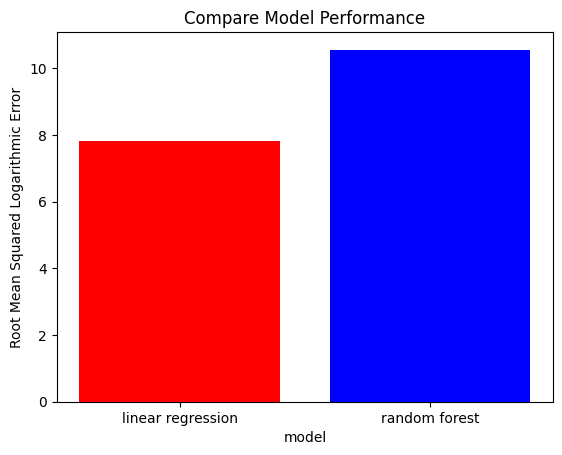

In [ ]:
rmsle=[rmsle_0,rmsle]
model=['linear regression','random forest']
# ploting bar plot
plt.bar(model,rmsle,color=['red','blue'])
plt.xlabel('model')
plt.ylabel('Root Mean Squared Logarithmic Error')
plt.title('Compare Model Performance')
plt.show()

In [ ]:
# Predict on the test set using the trained Random Forest model
X_test = test.drop('SalePrice', axis=1)
y_test = test['SalePrice']
y_pred_1 = lr_model.predict(X_test)
mse_0 = mean_squared_error(y_test, y_pred_1)

lr_model_prediction_1=np.maximum(y_pred_1,0)
lr_test=np.maximum(y_test,0)

rmsle_1= np.sqrt(mean_squared_log_error(lr_test, lr_model_prediction_1))
print('RMSLE_0 :', rmsle_1)

RMSLE_0 : 9.625694816418957


In [ ]:
import pandas as pd

# Read the full original test file to get all SalesIDs
test_original = pd.read_csv('Test.csv')

# Create the submission DataFrame using the full SalesID column
submission_df = pd.DataFrame({
    'SalesID': test_original['SalesID'],
    'SalePrice': lr_model_prediction_1  # This should be the same length as test_original
})

# Save to CSV
submission_df.to_csv('test_predictions.csv', index=False, float_format='%.2f')

# Show the first 5 rows
submission_df.head()
submission_df.shape


(12457, 2)